In [1]:
wants <- c("car","ggplot2","reshape", "tidyverse", "hrbrthemes", "viridis", "plotly")
has   <- wants %in% rownames(installed.packages())
if(any(!has)) install.packages(wants[!has],repos="https://cloud.r-project.org/")


In [2]:
version$version.string

[1] "R version 3.5.2 (2018-12-20)"

In [3]:
library(car)
library(ggplot2)
library(reshape)

library(tidyverse)
library(hrbrthemes)
library(viridis)
library(plotly)
options(repr.plot.width=11, repr.plot.height=6)

data=read.csv2("final reults.csv",row.names=1)

Warning message:
"package 'ggplot2' was built under R version 3.5.3"
Attaching package: 'ggplot2'

The following object is masked from 'package:crayon':

    %+%

Warning message:
"package 'reshape' was built under R version 3.5.3"Warning message:
"package 'tidyverse' was built under R version 3.5.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.0.1       v purrr   0.3.0  
v tidyr   0.8.2       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v tibble  2.0.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x ggplot2::%+%()  masks crayon::%+%()
x tidyr::expand() masks reshape::expand()
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::recode() masks car::recode()
x dplyr::rename() masks reshape::rename()
x dplyr::select() masks MASS::select()
x purrr::some()   masks car::some()
Warning message:
"package 'hrbrthemes' was built under R version 

In [4]:
data=data[!((rownames(data)=="EM_45c")|(rownames(data)=="LF_18a")|(rownames(data)=="LF_31b")),]
data["IRT_cat"]="Balanceado"
data[data$IRT_difficulty<=(-1.0),"IRT_cat"]="Fácil"
data[data$IRT_difficulty>=(1.0) ,"IRT_cat"]="Difícil"
data$IRT_cat=factor(data$IRT_cat, levels=c("Fácil","Balanceado","Difícil"))
summary(data$IRT_cat)

Fácil Balanceado    Difícil 
        11         83         37

In [5]:
data_2=data[!data$process_2=="undefined",]
data_6=data[!data$process_6=="undefined",]

In [6]:
data$process_6=factor(data$process_6, levels=c("undefined","Recordar","Comprender","Aplicar","Analizar","Evaluar","Crear"))
data$process_2=factor(data$process_2, levels=c("undefined","Retener","Transferir"))

data_6$process_6=factor(data_6$process_6, levels=c("Recordar","Comprender","Aplicar","Analizar","Evaluar","Crear"))
data_2$process_2=factor(data_2$process_2, levels=c("Retener","Transferir"))

colnames(data)
summary(data)

[1] "process_6"      "process_2"      "IRT_difficulty" "KNN"           
 [5] "RBF_SVM"        "Rand_Forest"    "AdaBoost"       "Naive_Bayes"   
 [9] "QDA"            "IRT_cat"

      process_6       process_2   IRT_difficulty         KNN        
 undefined :50   undefined :  4   Min.   :-2.0000   Min.   :0.0000  
 Recordar  :12   Retener   : 12   1st Qu.:-0.2010   1st Qu.:0.5000  
 Comprender:42   Transferir:115   Median : 0.4050   Median :0.7670  
 Aplicar   : 3                    Mean   : 0.4102   Mean   :0.7214  
 Analizar  :17                    3rd Qu.: 1.0000   3rd Qu.:1.0000  
 Evaluar   : 4                    Max.   : 3.0000   Max.   :1.0000  
 Crear     : 3                                                      
    RBF_SVM        Rand_Forest        AdaBoost       Naive_Bayes    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.5000   1st Qu.:0.3330   1st Qu.:0.3665   1st Qu.:0.3000  
 Median :0.7330   Median :0.6430   Median :0.6670   Median :0.5000  
 Mean   :0.6971   Mean   :0.5293   Mean   :0.6421   Mean   :0.4913  
 3rd Qu.:1.0000   3rd Qu.:0.8835   3rd Qu.:1.0000   3rd Qu.:0.7000  
 Max.   :1.0000   Max.   :1.0000  

In [7]:
data_clasifs=data[,c("KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA")]
data_clasifs_melt=melt(data_clasifs)
colnames(data_clasifs_melt)=c("Clasificador","Desempeño")
data_clasifs_melt$Clasificador=factor(data_clasifs_melt$Clasificador, levels=c("KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA"))


Using  as id variables


In [8]:
dat_AOV_2=melt(data_2,
               id.vars = c("process_2","IRT_difficulty","IRT_cat"),
               measure.vars = c("KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA"))
colnames(dat_AOV_2)=c("process_2","IRT_difficulty","IRT_cat","Clasificador","Desempeño")
dat_AOV_2$Clasificador=factor(dat_AOV_2$Clasificador, levels=c("KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA"))

In [9]:
dat_AOV_6=melt(data_6,
               id.vars = c("process_6","IRT_difficulty","IRT_cat"),
               measure.vars = c("KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA"))
colnames(dat_AOV_6)=c("process_6","IRT_difficulty","IRT_cat","Clasificador","Desempeño")
dat_AOV_6$Clasificador=factor(dat_AOV_6$Clasificador, levels=c("KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA"))

# Explore Data

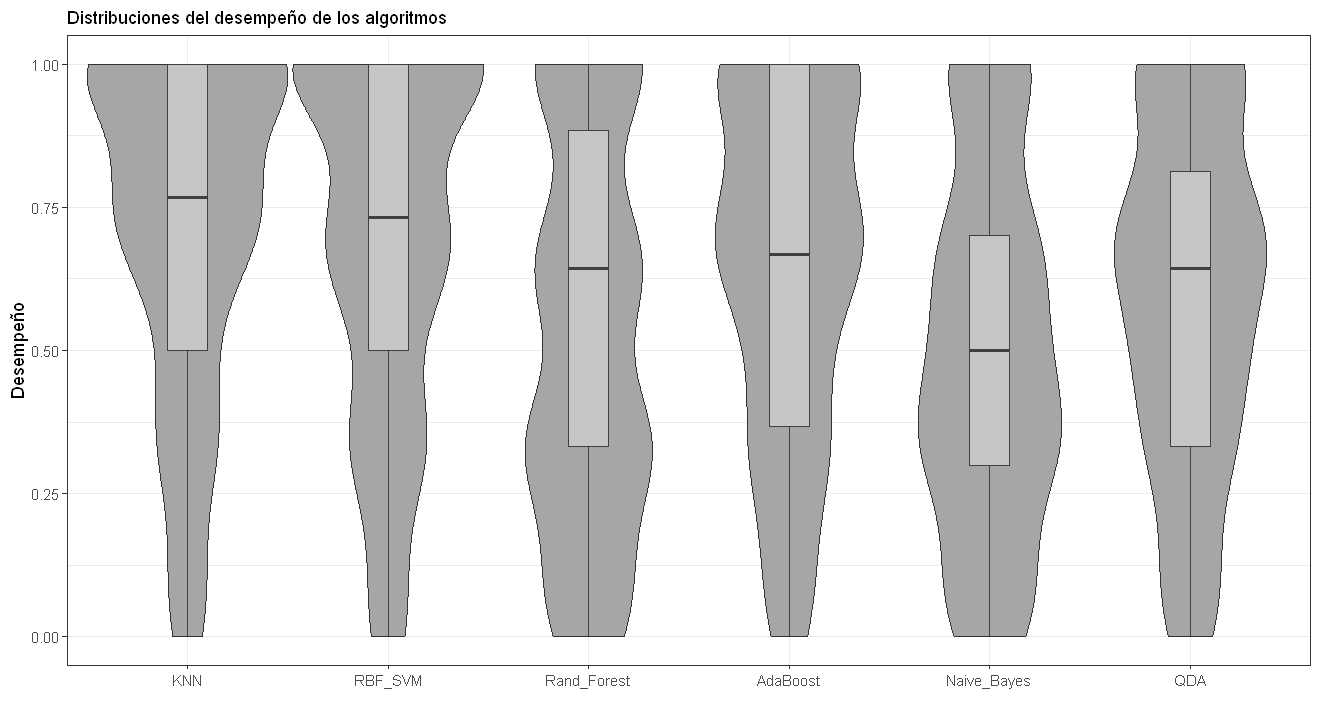

In [10]:
# sample size
#sample_size = data_clasifs_melt %>% group_by(Clasificador) %>% summarize(num=n())
# Plot
data_clasifs_melt %>%
#  left_join(sample_size) %>%
#  mutate(myaxis = paste0(Clasificador, "\n", "n=", num)) %>%
  ggplot( aes(x=Clasificador, y=Desempeño)) +
    geom_violin(width=1, fill="gray65") + #width=1.4
    geom_boxplot(width=.2, color="gray25", alpha=0.5, fill="gray90") +
    theme_bw() +
#     theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("Distribuciones del desempeño de los algoritmos") +
    xlab("")+
    ylab("Desempeño")
#ggsave(filename = "f1_clasifs.jpeg",device="jpeg", width =11, height = 6, units = "in")

In [11]:
table(data_2$process_2, data_2$IRT_cat)
table(data_6$process_6, data_6$IRT_cat)

            
             Fácil Balanceado Difícil
  Retener        1          7       4
  Transferir    10         75      30

            
             Fácil Balanceado Difícil
  Recordar       1          7       4
  Comprender     4         28      10
  Aplicar        0          3       0
  Analizar       2          9       6
  Evaluar        2          2       0
  Crear          0          1       2

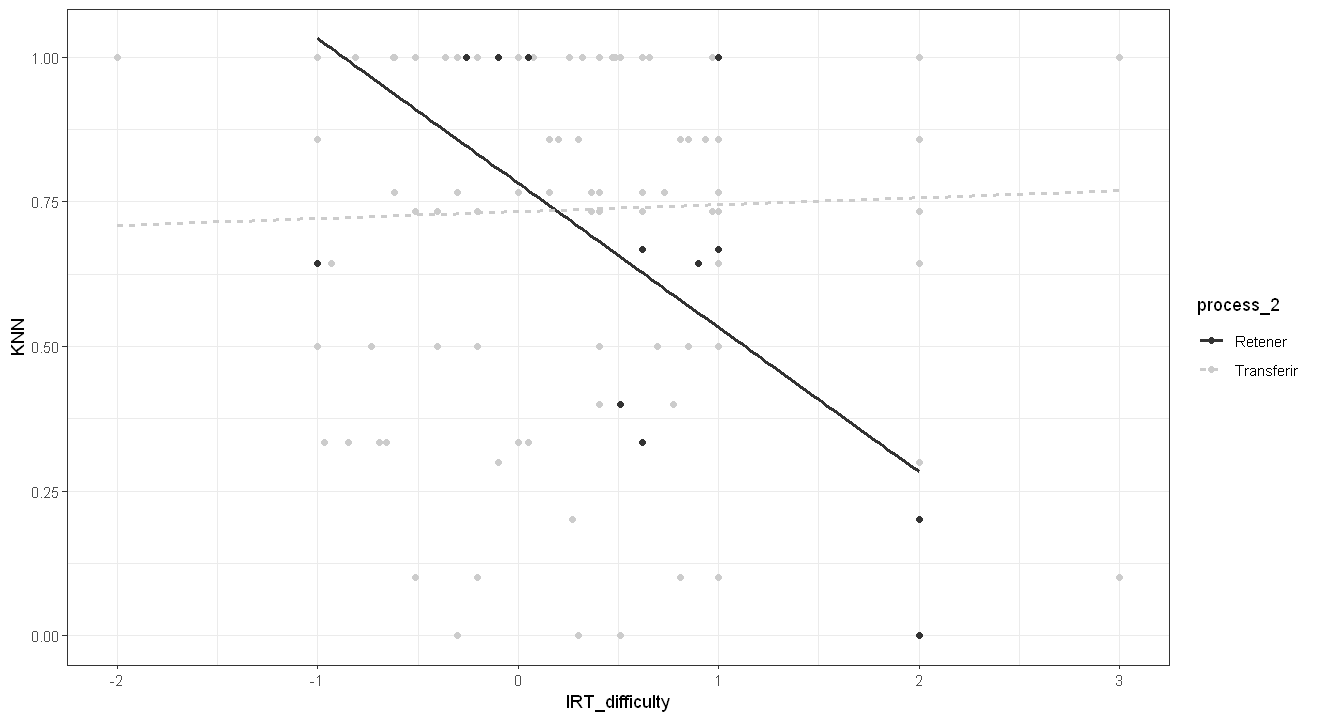

In [12]:
ggplot(data_2, aes(IRT_difficulty, KNN, color=process_2, linetype=process_2)) +
  geom_point() +
  theme_bw() +
  scale_color_grey() +
  geom_smooth(method = "lm", se = FALSE)

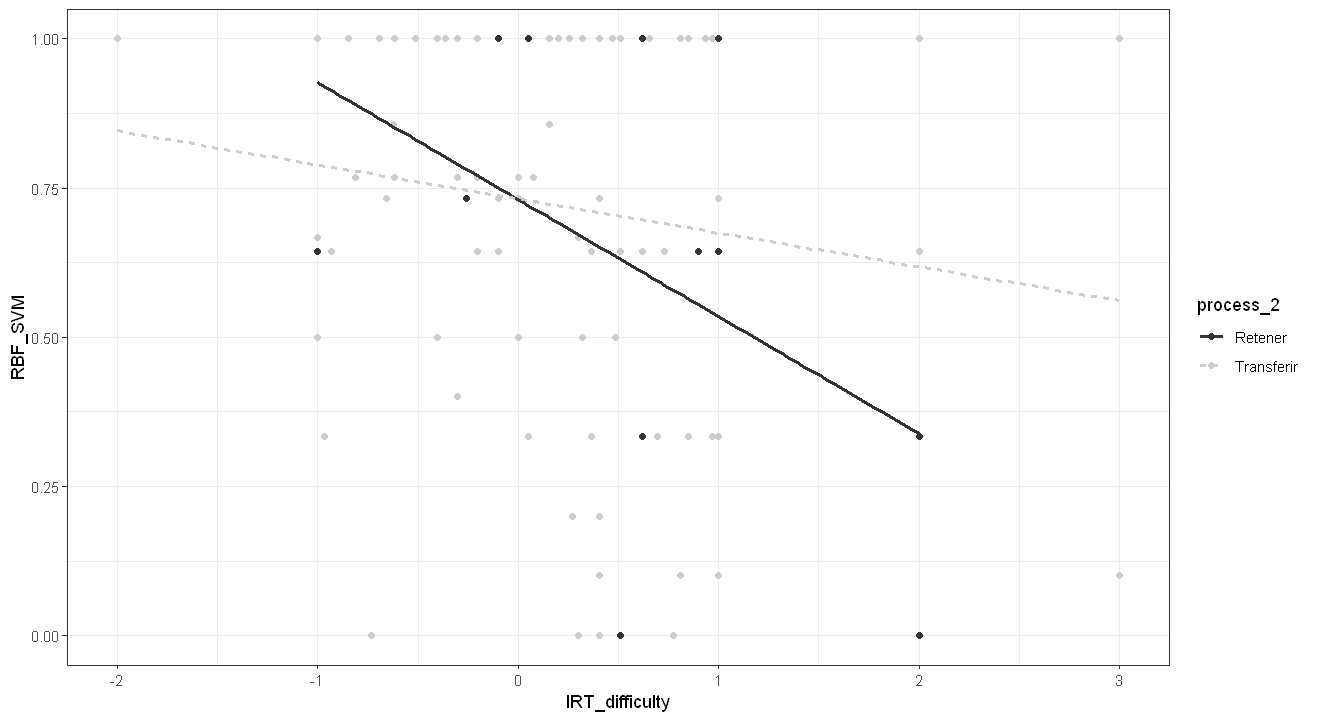

In [13]:
ggplot(data_2, aes(IRT_difficulty, RBF_SVM, color=process_2, linetype=process_2)) +
  geom_point() +
  theme_bw() +
  scale_color_grey() +
  geom_smooth(method = "lm", se = FALSE)

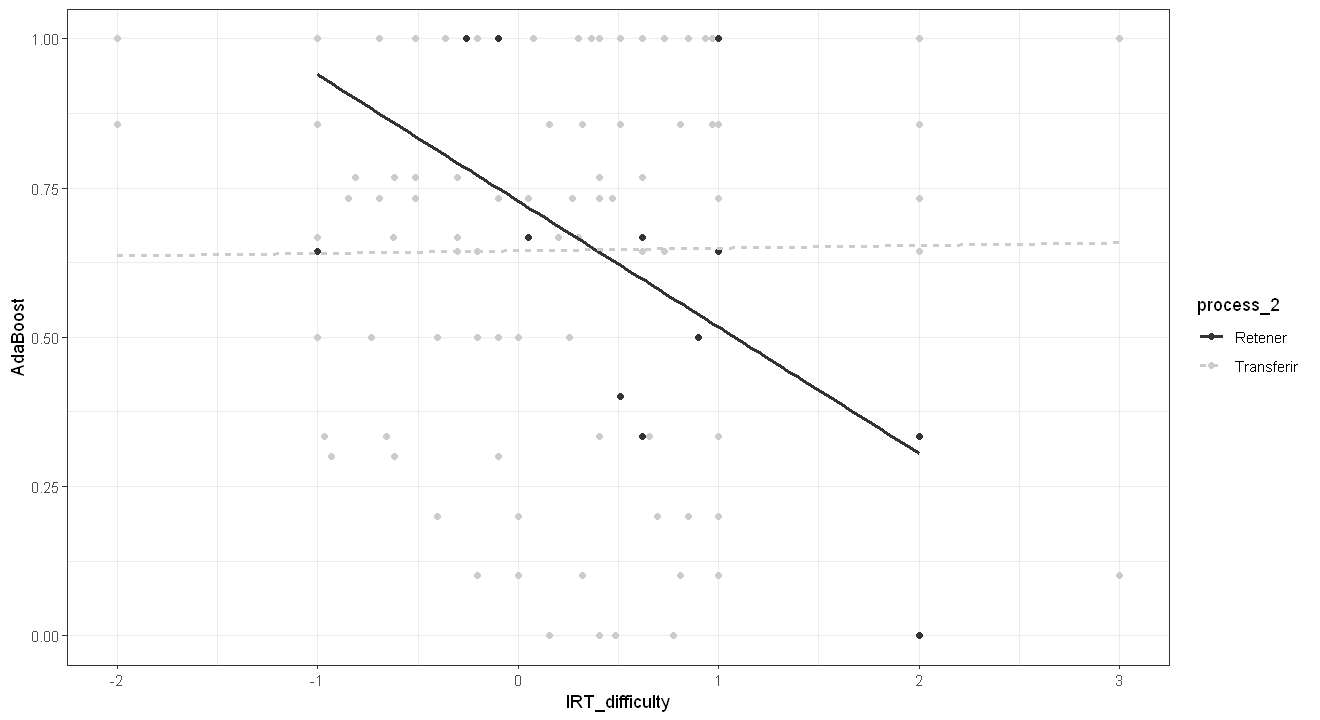

In [14]:
ggplot(data_2, aes(IRT_difficulty, AdaBoost, color=process_2, linetype=process_2)) +
  geom_point() +
  theme_bw() +
  scale_color_grey() +
  geom_smooth(method = "lm", se = FALSE)

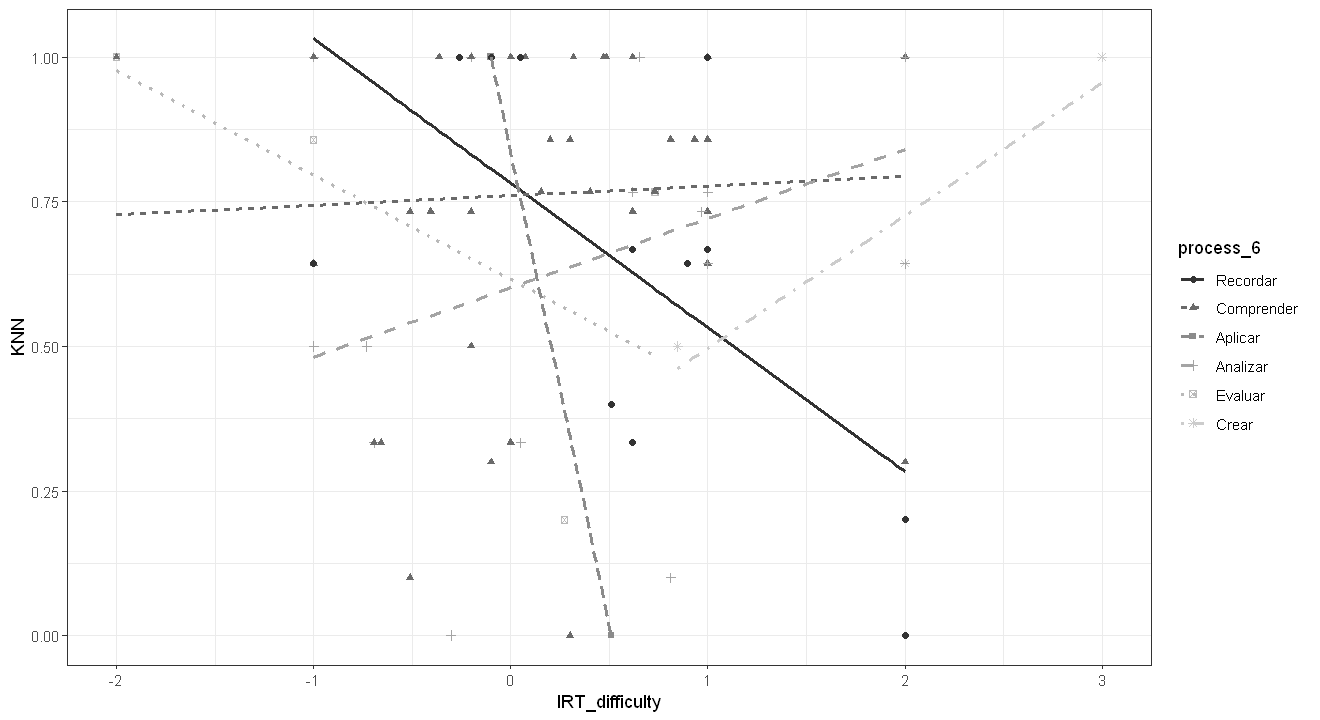

In [15]:
ggplot(data_6, aes(IRT_difficulty, KNN, color=process_6, linetype=process_6, shape=process_6)) +
  geom_point() +
  theme_bw() +
  scale_color_grey() +
  geom_smooth(method = "lm", se = FALSE)

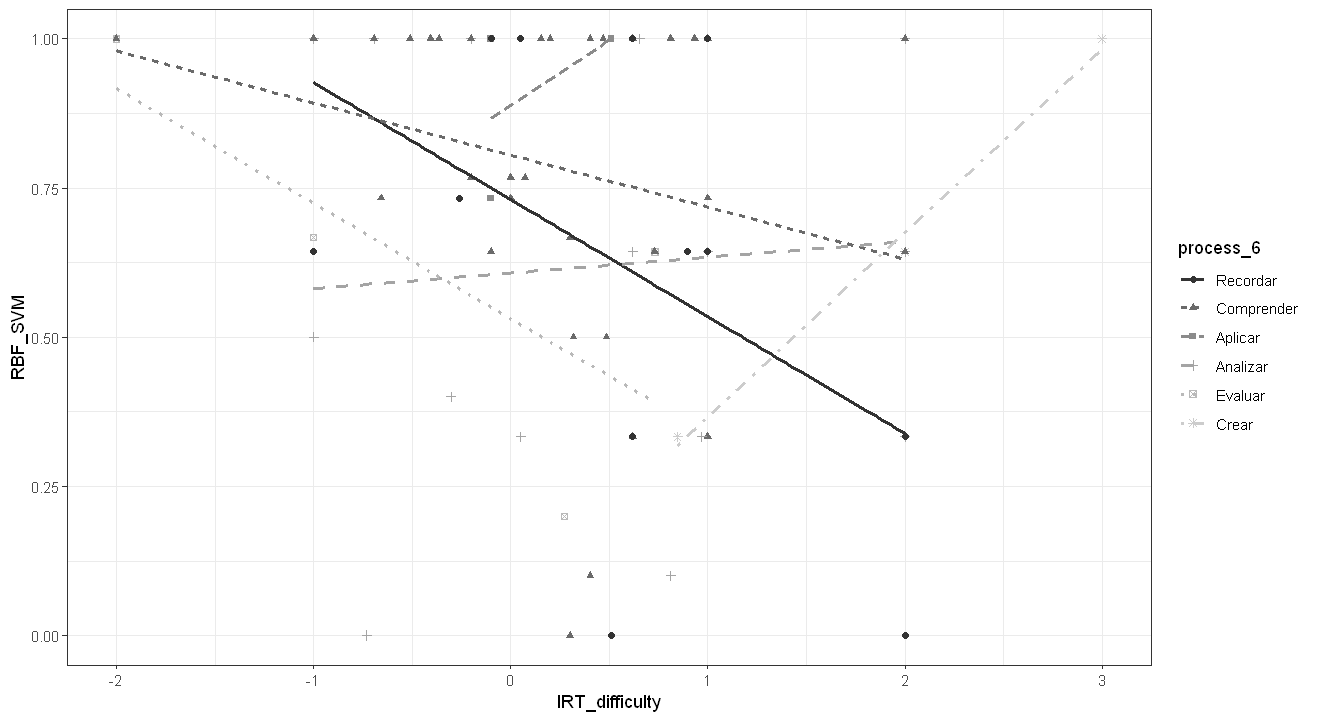

In [16]:
ggplot(data_6, aes(IRT_difficulty, RBF_SVM, color=process_6, linetype=process_6, shape=process_6)) +
  geom_point() +
  theme_bw() +
  scale_color_grey() +
  geom_smooth(method = "lm", se = FALSE)

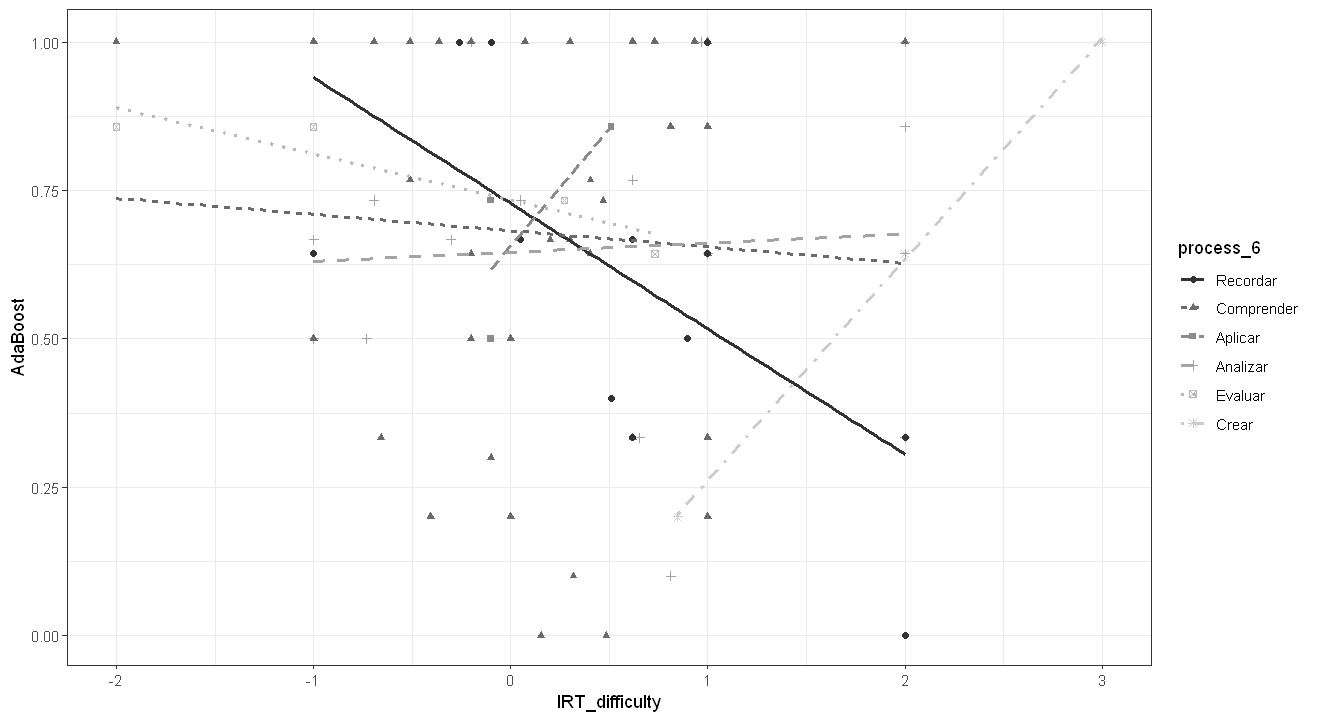

In [17]:
ggplot(data_6, aes(IRT_difficulty, AdaBoost, color=process_6, linetype=process_6, shape=process_6)) +
  geom_point() +
  theme_bw() +
  scale_color_grey() +
  geom_smooth(method = "lm", se = FALSE)

In [18]:
plot_y_lims=c(.35,.9)

# MANOVA
[Doc Guía](https://www.r-bloggers.com/multiple-analysis-of-variance-manova/)

In [19]:
process_2_maov <- manova(cbind(KNN,RBF_SVM,Rand_Forest,AdaBoost,Naive_Bayes,QDA) ~ process_2 * IRT_cat, data=data_2)
summary(process_2_maov)
summary.aov(process_2_maov)

                   Df   Pillai approx F num Df den Df   Pr(>F)   
process_2           1 0.026071  0.51753      6    116 0.794052   
IRT_cat             2 0.225543  2.47856     12    234 0.004534 **
process_2:IRT_cat   2 0.075317  0.76308     12    234 0.688114   
Residuals         121                                            
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response KNN :
                   Df  Sum Sq  Mean Sq F value Pr(>F)
process_2           1  0.1264 0.126438  1.4771 0.2266
IRT_cat             2  0.1071 0.053551  0.6256 0.5367
process_2:IRT_cat   2  0.2346 0.117290  1.3702 0.2580
Residuals         121 10.3575 0.085599               

 Response RBF_SVM :
                   Df  Sum Sq  Mean Sq F value Pr(>F)
process_2           1  0.1107 0.110661  1.1342 0.2890
IRT_cat             2  0.3578 0.178901  1.8336 0.1642
process_2:IRT_cat   2  0.0663 0.033168  0.3400 0.7125
Residuals         121 11.8056 0.097567               

 Response Rand_Forest :
                   Df  Sum Sq  Mean Sq F value Pr(>F)
process_2           1  0.0050 0.005019  0.0435 0.8351
IRT_cat             2  0.4471 0.223534  1.9375 0.1485
process_2:IRT_cat   2  0.3101 0.155029  1.3437 0.2647
Residuals         121 13.9599 0.115371               

 Response AdaBoost :
                   Df  Sum Sq  Mean Sq F value Pr(>F)
process_2           1  0.0248 0.024793  0.2646 0.607

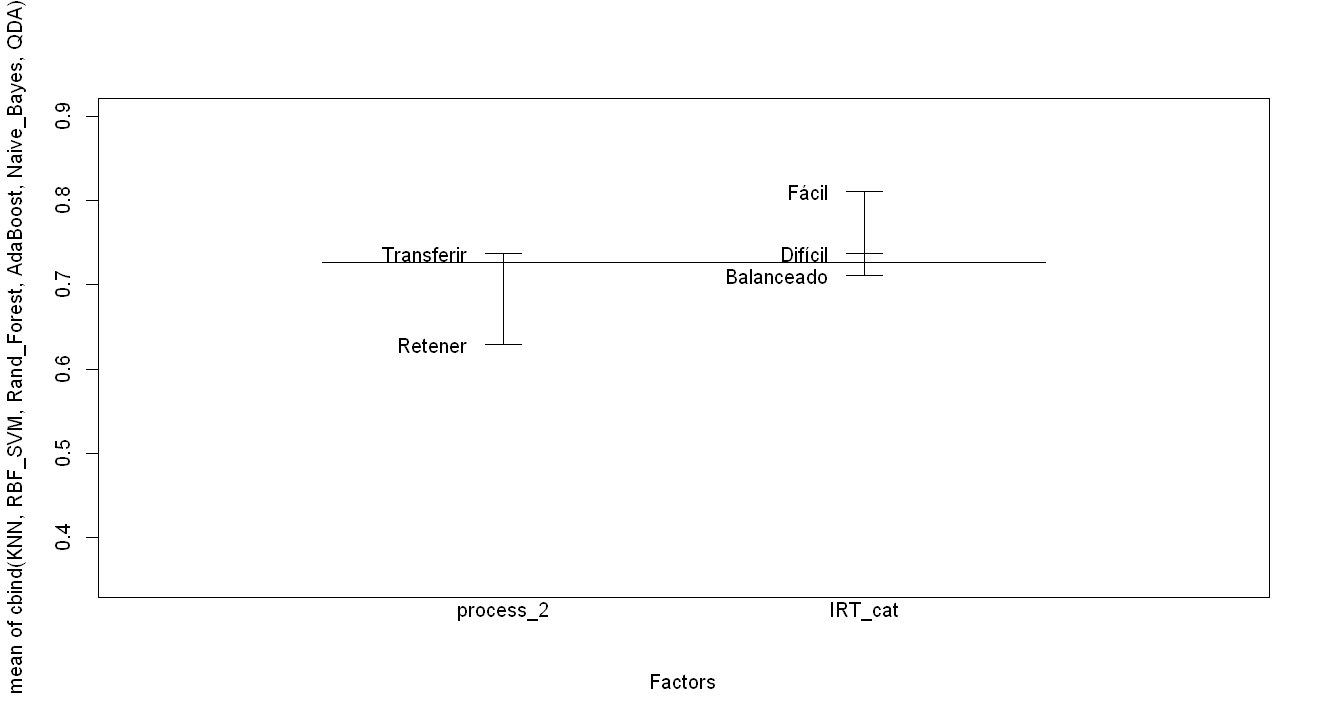

In [20]:
plot.design(cbind(KNN,RBF_SVM,Rand_Forest,AdaBoost,Naive_Bayes,QDA) ~ process_2 * IRT_cat, data=data_2,ylim=plot_y_lims)

In [21]:
leveneTest(KNN ~ process_2 * IRT_cat, data=data_2)
leveneTest(RBF_SVM ~ process_2 * IRT_cat, data=data_2)
leveneTest(Rand_Forest ~ process_2 * IRT_cat, data=data_2)
leveneTest(AdaBoost ~ process_2 * IRT_cat, data=data_2)
leveneTest(Naive_Bayes ~ process_2 * IRT_cat, data=data_2)
leveneTest(QDA ~ process_2 * IRT_cat, data=data_2)

,Df,F value,Pr(>F)
group,5,1.158364,0.3336955
,121,NA,NA


,Df,F value,Pr(>F)
group,5,1.468424,0.2051007
,121,NA,NA


,Df,F value,Pr(>F)
group,5,0.6181634,0.686178
,121,NA,NA


,Df,F value,Pr(>F)
group,5,0.929818,0.4642384
,121,NA,NA


,Df,F value,Pr(>F)
group,5,0.6348101,0.6735333
,121,NA,NA


,Df,F value,Pr(>F)
group,5,0.6452761,0.6656012
,121,NA,NA


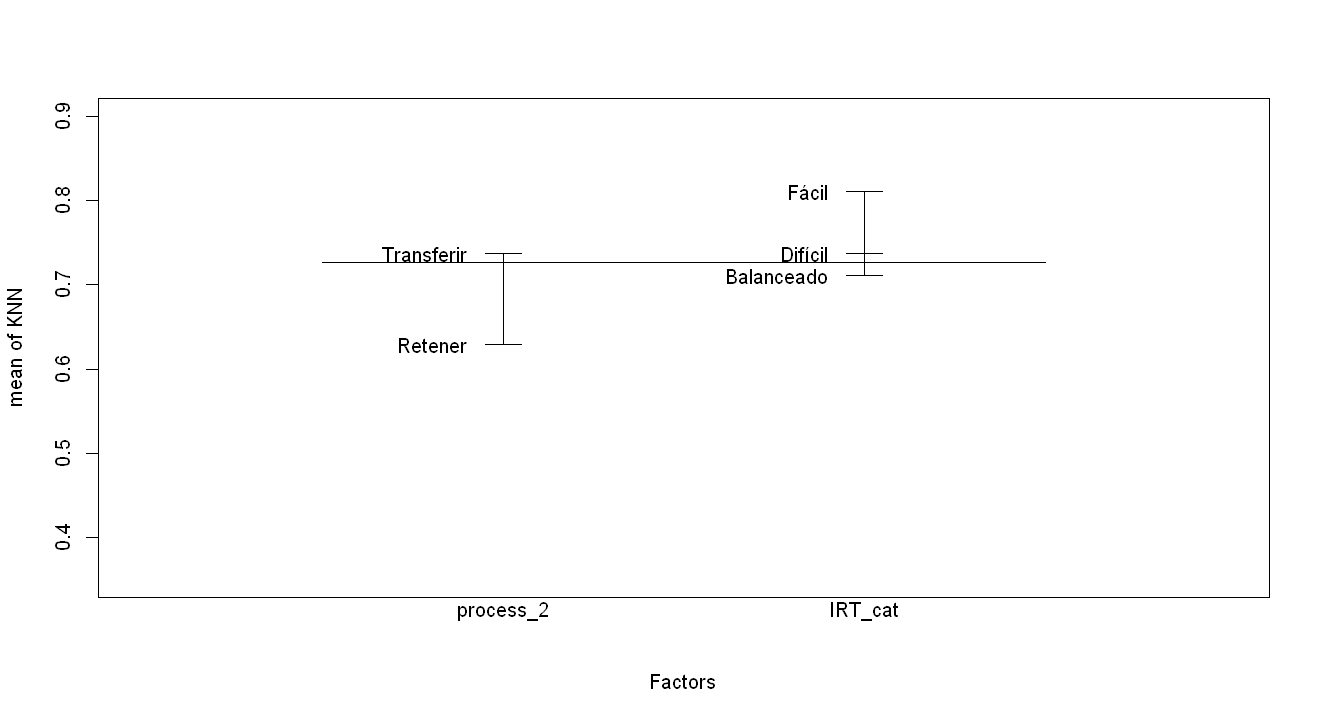

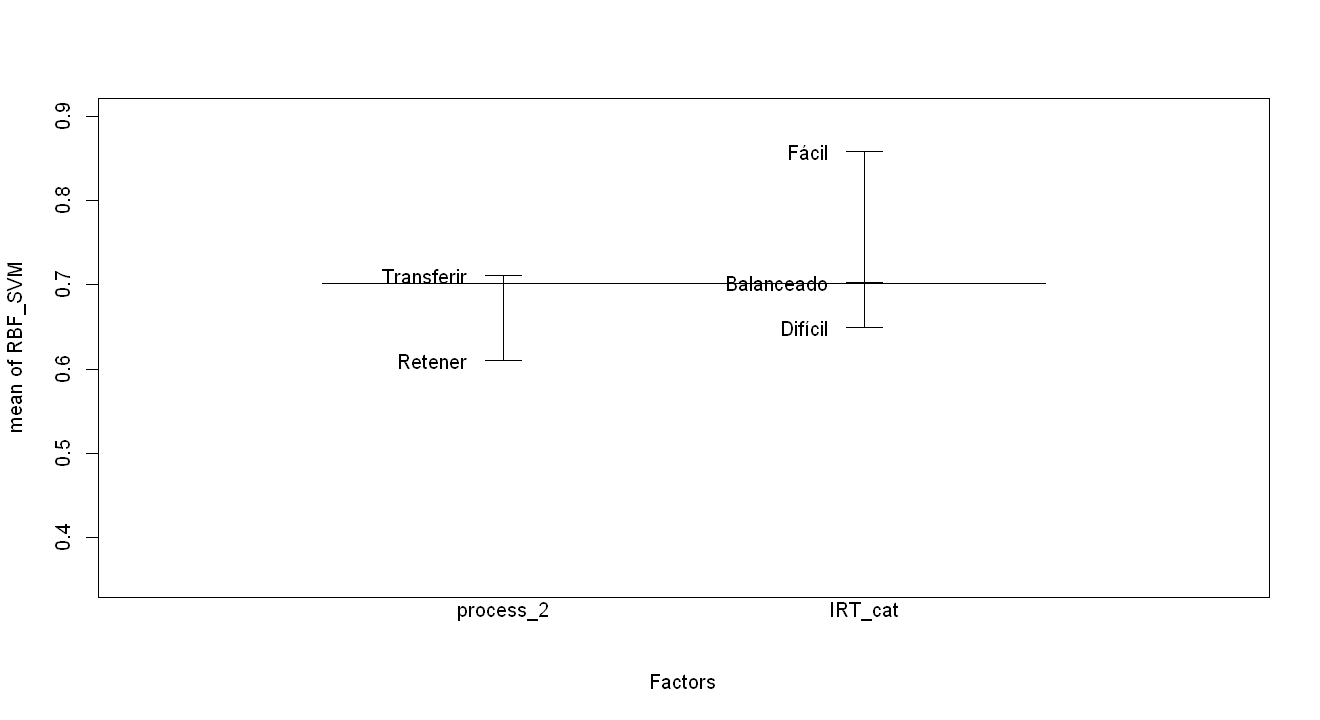

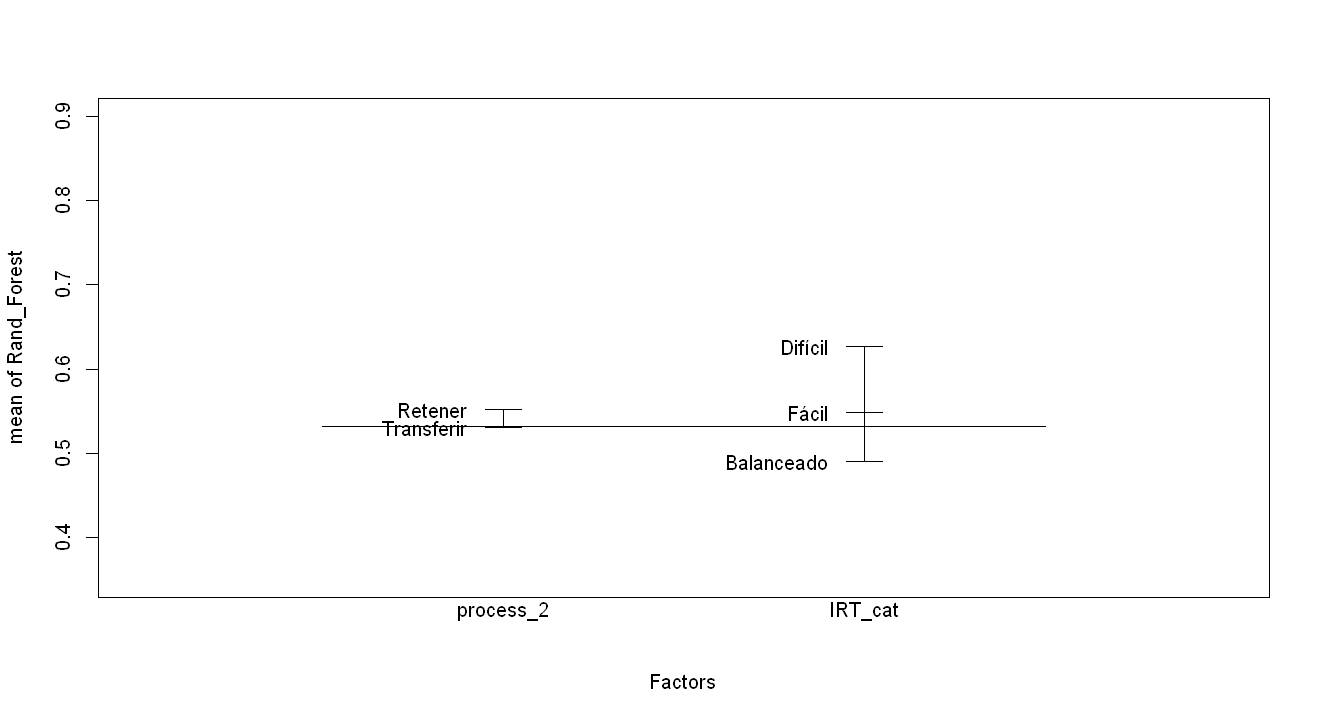

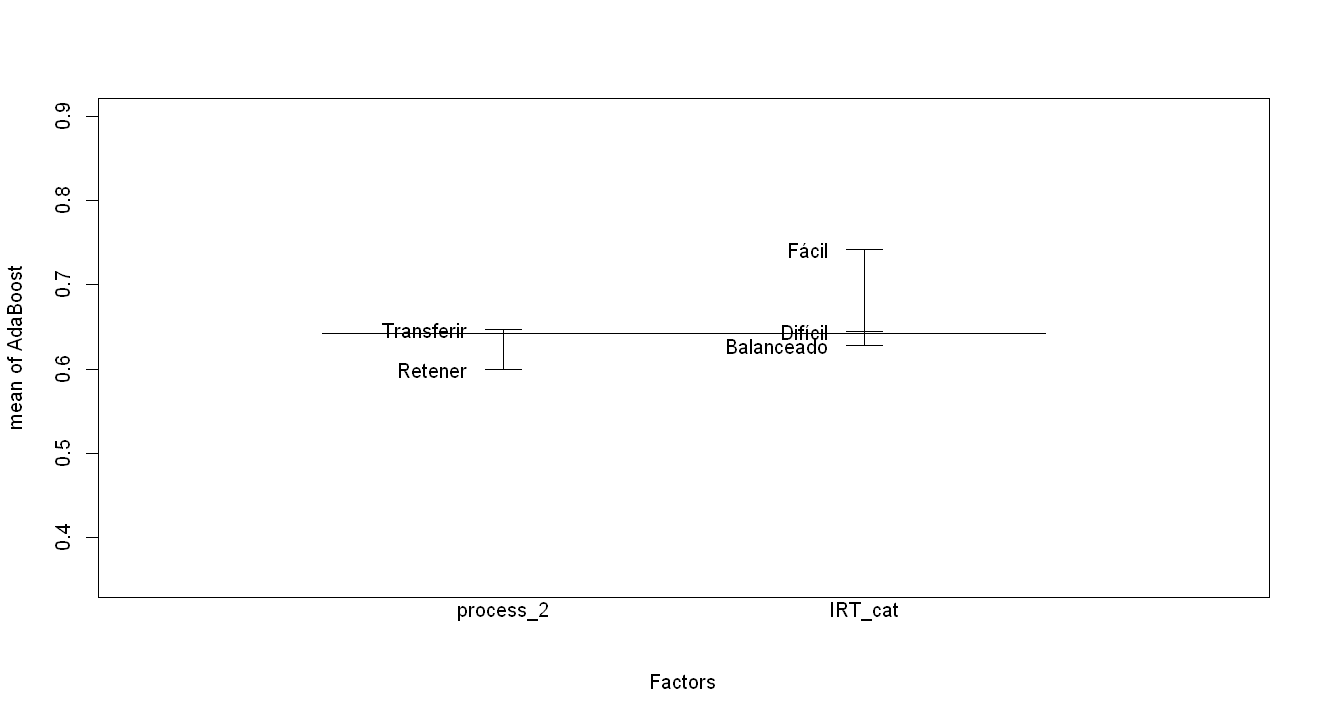

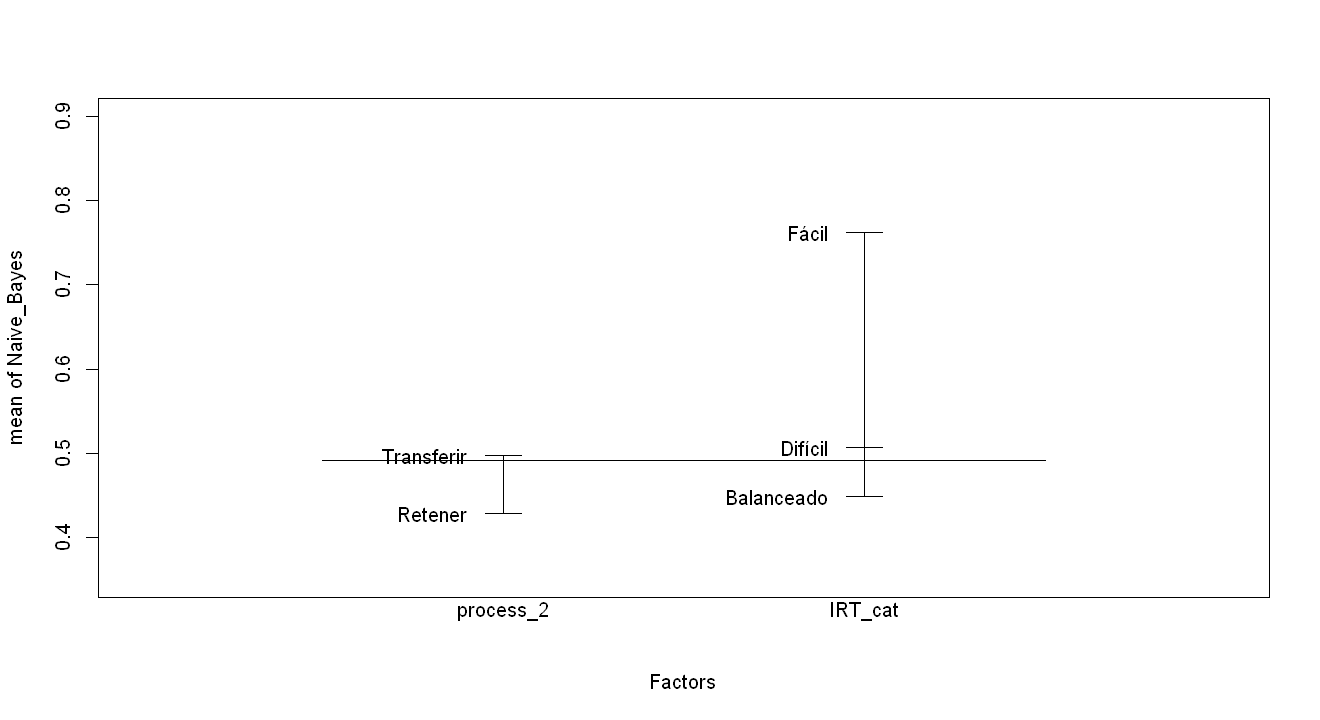

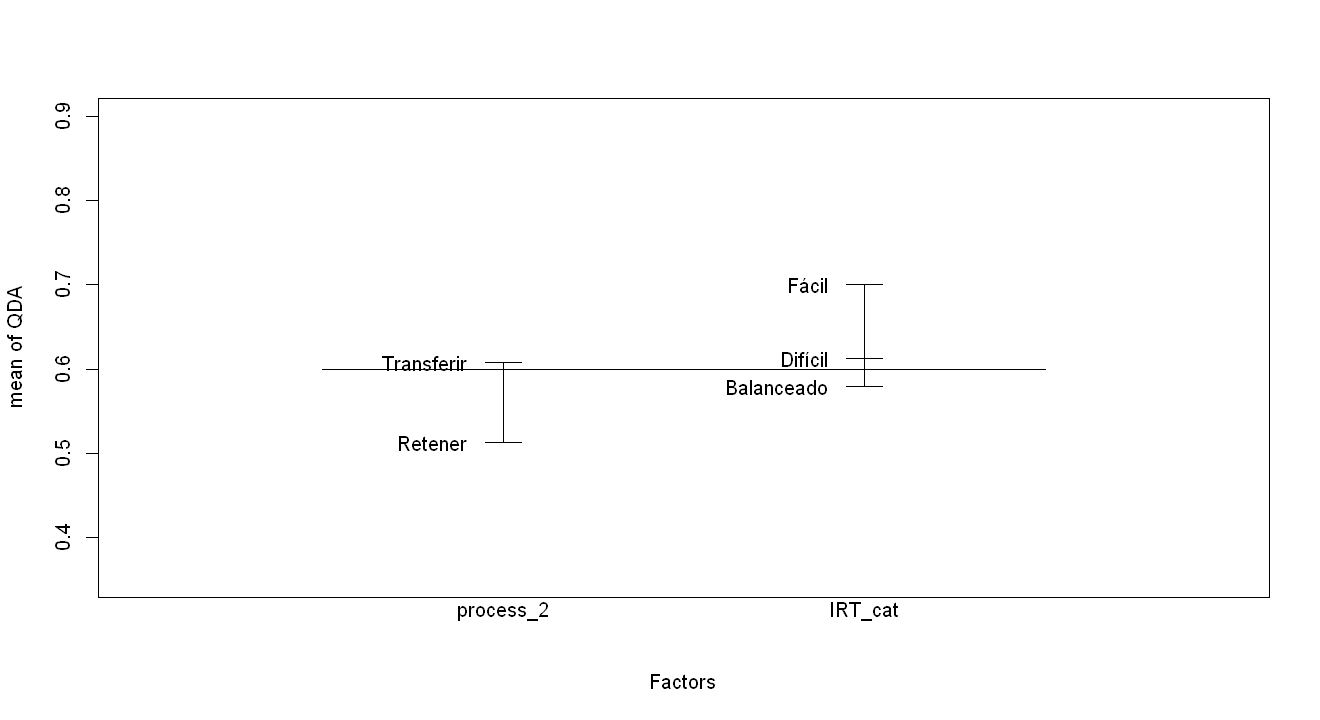

In [22]:
plot.design(KNN ~ process_2 * IRT_cat, data=data_2,ylim=plot_y_lims)
plot.design(RBF_SVM ~ process_2 * IRT_cat, data=data_2,ylim=plot_y_lims)
plot.design(Rand_Forest ~ process_2 * IRT_cat, data=data_2,ylim=plot_y_lims)
plot.design(AdaBoost ~ process_2 * IRT_cat, data=data_2,ylim=plot_y_lims)
plot.design(Naive_Bayes ~ process_2 * IRT_cat, data=data_2,ylim=plot_y_lims)
plot.design(QDA ~ process_2 * IRT_cat, data=data_2,ylim=plot_y_lims)

In [23]:
process_6_maov <- manova(cbind(KNN,RBF_SVM,Rand_Forest,AdaBoost,Naive_Bayes,QDA) ~ process_6 * IRT_cat, data=data_6)
summary(process_6_maov)
summary.aov(process_6_maov)

                  Df  Pillai approx F num Df den Df  Pr(>F)  
process_6          5 0.24997  0.57888     30    330 0.96416  
IRT_cat            2 0.32943  2.07056     12    126 0.02336 *
process_6:IRT_cat  6 0.44465  0.89377     36    402 0.64793  
Residuals         67                                         
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response KNN :
                  Df Sum Sq  Mean Sq F value Pr(>F)
process_6          5 0.2377 0.047534  0.5064 0.7704
IRT_cat            2 0.3457 0.172851  1.8413 0.1665
process_6:IRT_cat  6 0.6031 0.100515  1.0708 0.3889
Residuals         67 6.2894 0.093872               

 Response RBF_SVM :
                  Df Sum Sq  Mean Sq F value Pr(>F)
process_6          5 0.6516 0.130325  1.3757 0.2446
IRT_cat            2 0.3369 0.168459  1.7783 0.1768
process_6:IRT_cat  6 0.4334 0.072239  0.7626 0.6019
Residuals         67 6.3469 0.094730               

 Response Rand_Forest :
                  Df Sum Sq  Mean Sq F value Pr(>F)
process_6          5 0.1578 0.031567  0.2601 0.9332
IRT_cat            2 0.4735 0.236773  1.9511 0.1501
process_6:IRT_cat  6 0.8773 0.146210  1.2048 0.3148
Residuals         67 8.1307 0.121354               

 Response AdaBoost :
                  Df Sum Sq  Mean Sq F value Pr(>F)
process_6          5 0.1168 0.023353  0.2397 0.9435
IRT_cat            2 0.1119 0.05

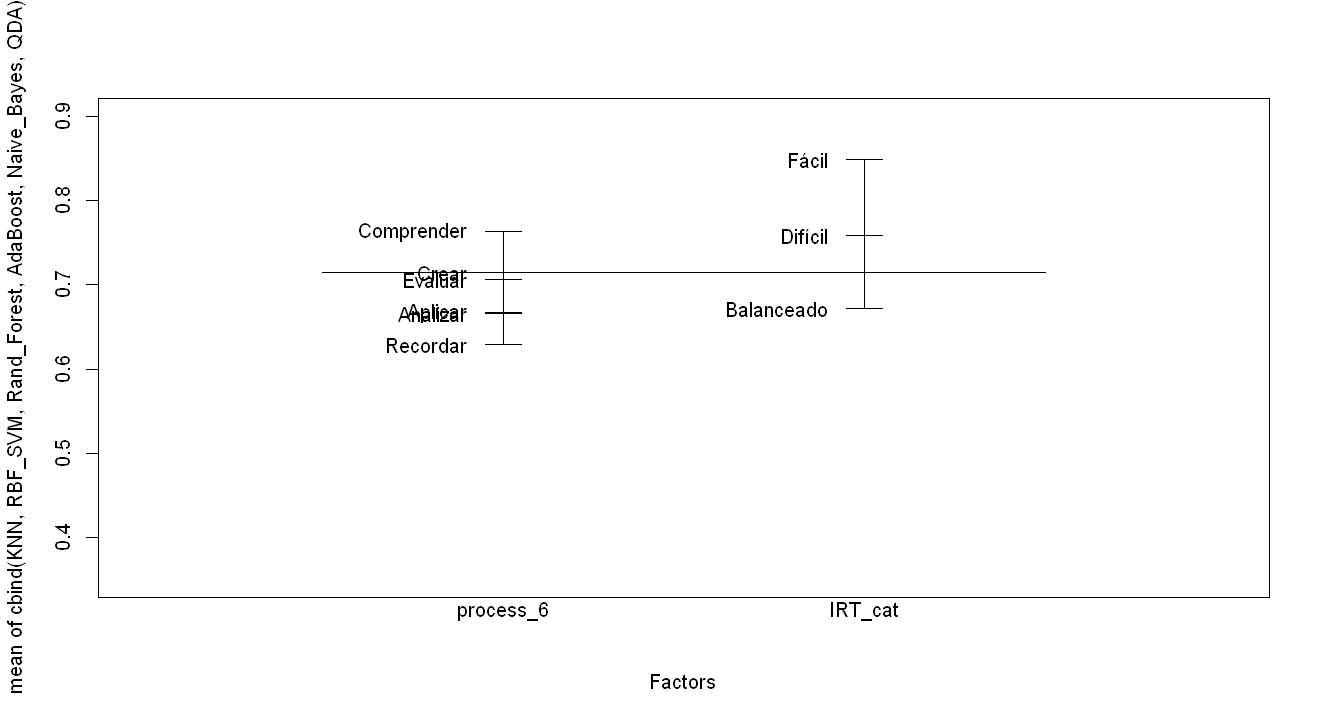

In [24]:
plot.design(cbind(KNN,RBF_SVM,Rand_Forest,AdaBoost,Naive_Bayes,QDA) ~ process_6 * IRT_cat, data=data_6,ylim=plot_y_lims)

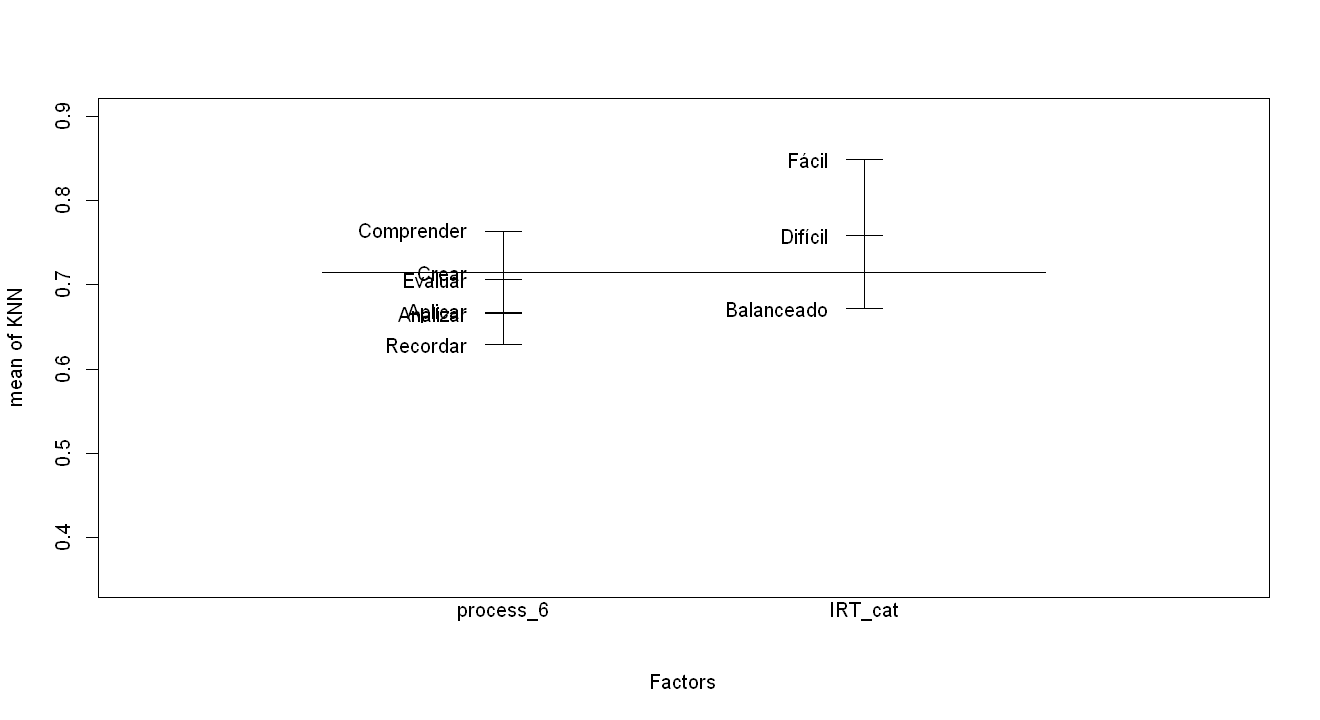

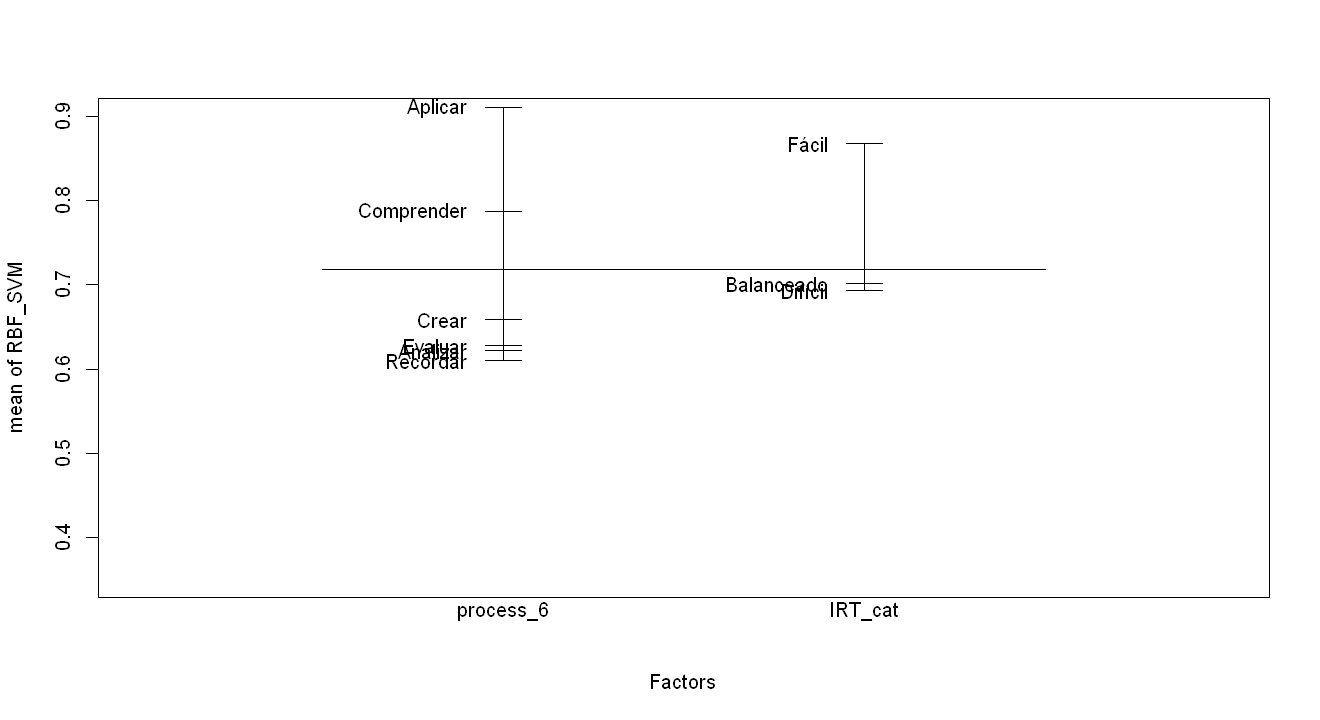

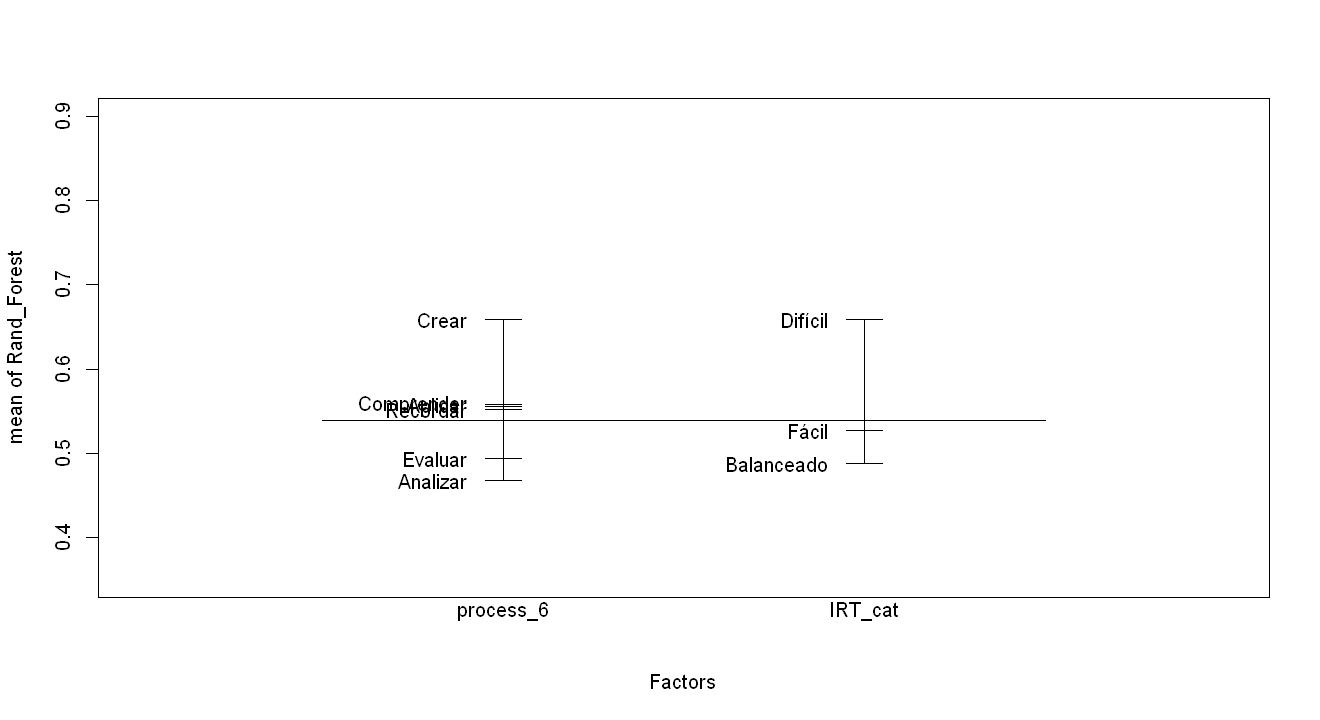

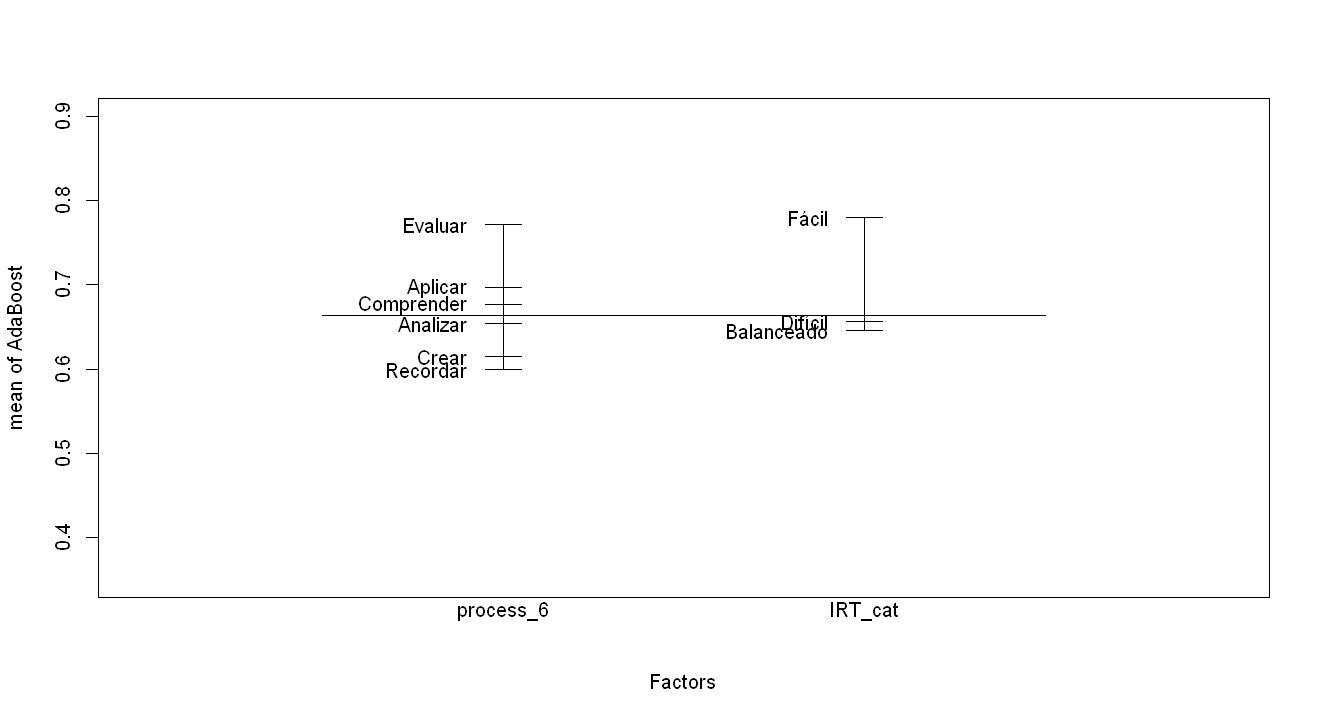

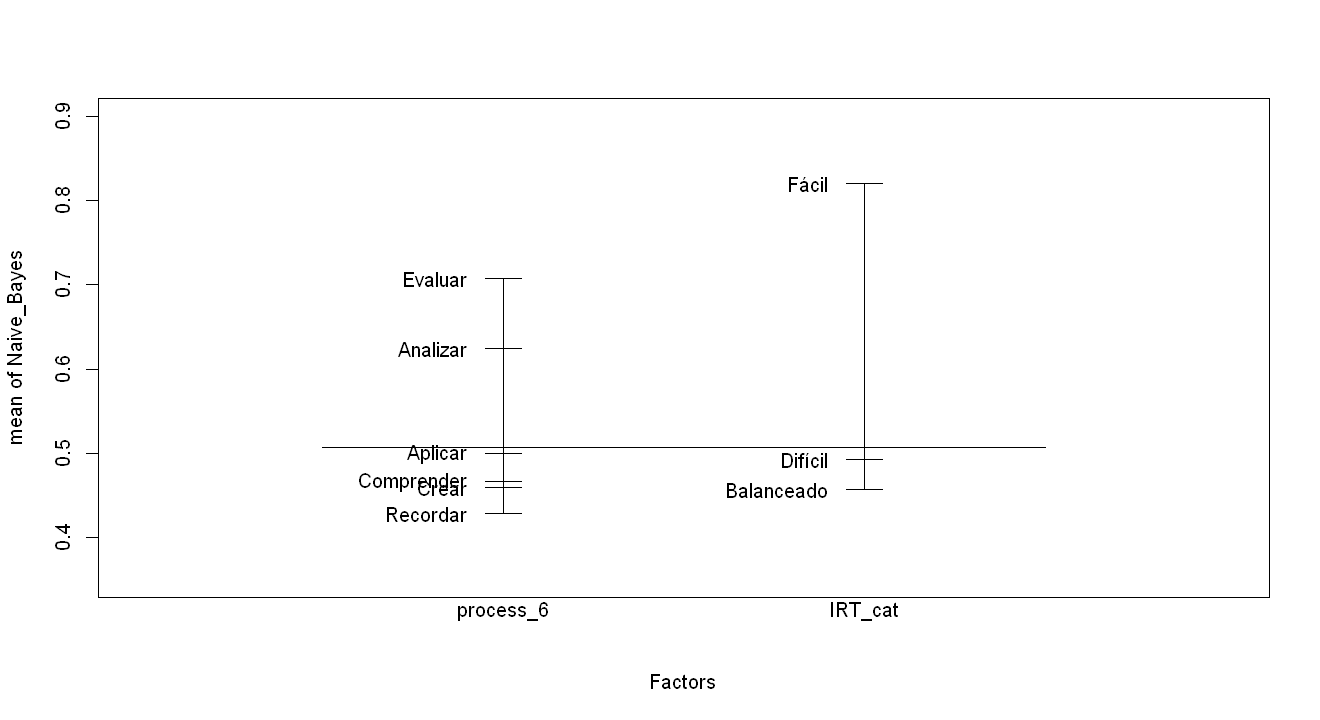

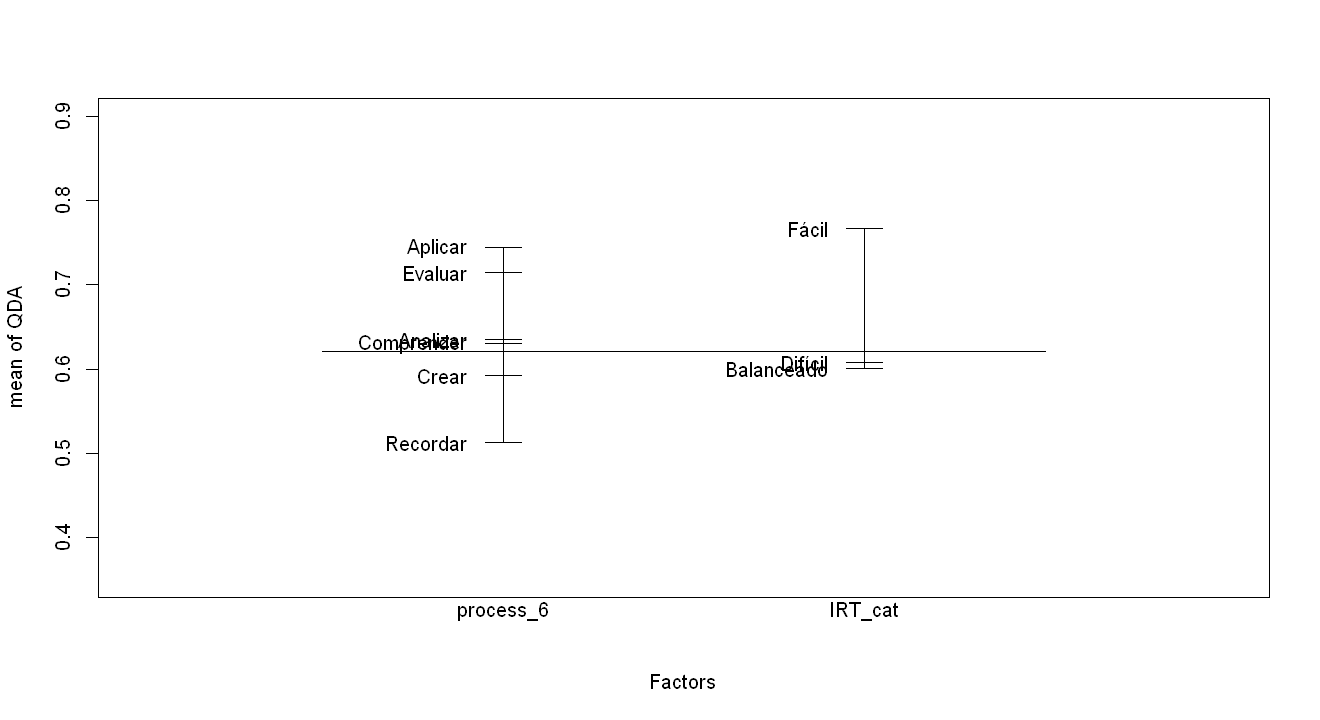

In [25]:
plot.design(KNN ~ process_6 * IRT_cat, data=data_6,ylim=plot_y_lims)
plot.design(RBF_SVM ~ process_6 * IRT_cat, data=data_6,ylim=plot_y_lims)
plot.design(Rand_Forest ~ process_6 * IRT_cat, data=data_6,ylim=plot_y_lims)
plot.design(AdaBoost ~ process_6 * IRT_cat, data=data_6,ylim=plot_y_lims)
plot.design(Naive_Bayes ~ process_6 * IRT_cat, data=data_6,ylim=plot_y_lims)
plot.design(QDA ~ process_6 * IRT_cat, data=data_6,ylim=plot_y_lims)

In [26]:
leveneTest(KNN ~ process_6 * IRT_cat, data=data_6)
leveneTest(RBF_SVM ~ process_6 * IRT_cat, data=data_6)
leveneTest(Rand_Forest ~ process_2 * IRT_cat, data=data_6)
leveneTest(AdaBoost ~ process_6 * IRT_cat, data=data_6)
leveneTest(Naive_Bayes ~ process_6 * IRT_cat, data=data_6)
leveneTest(QDA ~ process_6 * IRT_cat, data=data_6)

,Df,F value,Pr(>F)
group,13,0.9380456,0.5199168
,67,NA,NA


,Df,F value,Pr(>F)
group,13,1.212925,0.2900636
,67,NA,NA


,Df,F value,Pr(>F)
group,5,1.504549,0.1985815
,75,NA,NA


,Df,F value,Pr(>F)
group,13,1.522769,0.132286
,67,NA,NA


,Df,F value,Pr(>F)
group,13,1.306799,0.2313013
,67,NA,NA


,Df,F value,Pr(>F)
group,13,1.035432,0.4294334
,67,NA,NA


# ANOVAs

In [27]:
leveneTest(Desempeño ~ Clasificador * process_2 * IRT_cat, data = dat_AOV_2)
process_2_aov_3f <- aov(Desempeño ~ Clasificador * process_2 * IRT_cat, data = dat_AOV_2)
summary(process_2_aov_3f)
# drop1(process_2_aov_3f,~.,test="F") # type III SS and F Tests ### Resultados tipo SPSS ## https://www.statmethods.net/stats/anova.html
TukeyHSD(process_2_aov_3f,which =c("IRT_cat","process_2"))

,Df,F value,Pr(>F)
group,35,0.9327116,0.5819538
,726,NA,NA


                                Df Sum Sq Mean Sq F value          Pr(>F)    
Clasificador                     5   5.52  1.1037  11.542 0.0000000000962 ***
process_2                        1   0.29  0.2885   3.016         0.08285 .  
IRT_cat                          2   1.28  0.6420   6.713         0.00129 ** 
Clasificador:process_2           5   0.13  0.0257   0.269         0.93022    
Clasificador:IRT_cat            10   0.89  0.0888   0.929         0.50585    
process_2:IRT_cat                2   0.50  0.2483   2.597         0.07520 .  
Clasificador:process_2:IRT_cat  10   0.31  0.0314   0.329         0.97353    
Residuals                      726  69.43  0.0956                            
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Desempeño ~ Clasificador * process_2 * IRT_cat, data = dat_AOV_2)

$IRT_cat
                          diff         lwr          upr     p adj
Balanceado-Fácil   -0.14453852 -0.23974188 -0.049335170 0.0011252
Difícil-Fácil      -0.10613281 -0.20897812 -0.003287493 0.0412784
Difícil-Balanceado  0.03840572 -0.02207217  0.098883612 0.2956255

$process_2
                         diff          lwr       upr    p adj
Transferir-Retener 0.06651643 -0.008672478 0.1417053 0.082848


Warning message:
"not plotting observations with leverage one:
  115, 242, 369, 496, 623, 750"Warning message:
"not plotting observations with leverage one:
  115, 242, 369, 496, 623, 750"

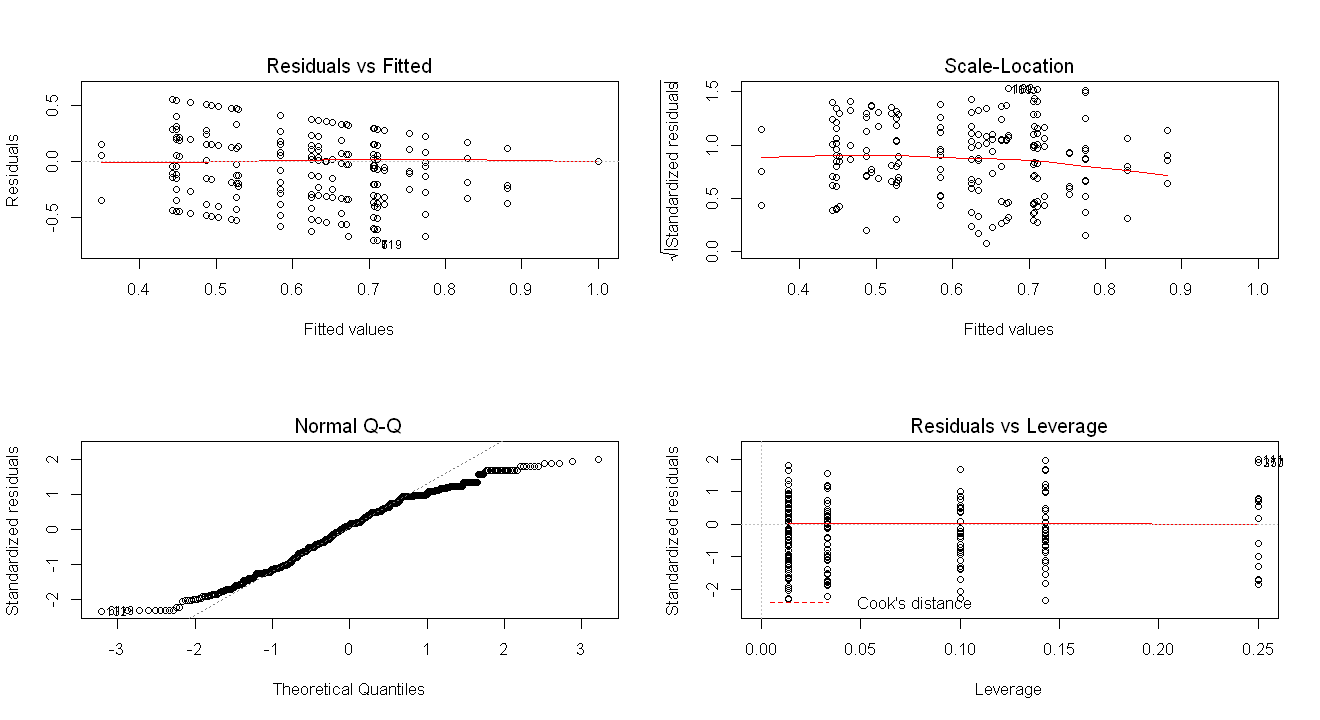

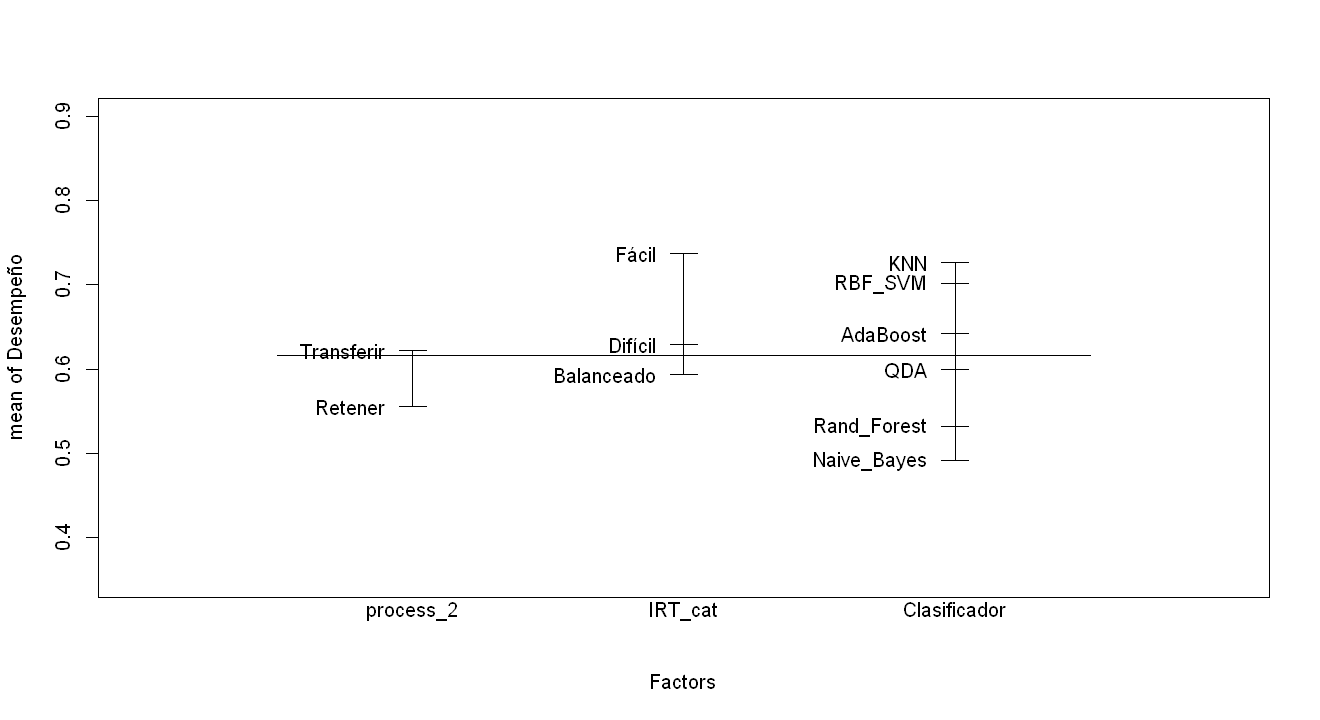

In [28]:
layout(matrix(c(1,2,3,4),2,2)) # optional layout
plot(process_2_aov_3f) # diagnostic plots
par(mfrow=c(1,1))
plot.design(Desempeño~ ., data = dat_AOV_2[c("process_2","IRT_cat","Clasificador","Desempeño")],ylim=plot_y_lims)

In [29]:
leveneTest(Desempeño ~ Clasificador * process_6 * IRT_cat, data = dat_AOV_6)
process_6_aov_3f <- aov(Desempeño ~ Clasificador * process_6 * IRT_cat, data = dat_AOV_6)
summary(process_6_aov_3f)
TukeyHSD(process_6_aov_3f ,which =c("IRT_cat","process_6"))

,Df,F value,Pr(>F)
group,83,1.104976,0.2648485
,402,NA,NA


                                Df Sum Sq Mean Sq F value     Pr(>F)    
Clasificador                     5   3.21  0.6428   6.509 0.00000777 ***
process_6                        5   0.59  0.1190   1.205   0.305914    
IRT_cat                          2   1.56  0.7790   7.889   0.000436 ***
Clasificador:process_6          25   1.35  0.0539   0.545   0.965276    
Clasificador:IRT_cat            10   0.73  0.0726   0.736   0.690932    
process_6:IRT_cat                6   1.84  0.3065   3.104   0.005541 ** 
Clasificador:process_6:IRT_cat  30   1.34  0.0447   0.453   0.994920    
Residuals                      402  39.70  0.0987                       
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Desempeño ~ Clasificador * process_6 * IRT_cat, data = dat_AOV_6)

$IRT_cat
                          diff         lwr         upr     p adj
Balanceado-Fácil   -0.17052420 -0.27979807 -0.06125033 0.0007997
Difícil-Fácil      -0.10799084 -0.22740197  0.01142030 0.0856141
Difícil-Balanceado  0.06253336 -0.01467538  0.13974211 0.1384746

$process_6
                            diff         lwr        upr     p adj
Comprender-Recordar  0.092007937 -0.02823577 0.21225164 0.2441457
Aplicar-Recordar     0.123722222 -0.11340157 0.36084601 0.6682937
Analizar-Recordar    0.056094771 -0.08240998 0.19459952 0.8556053
Evaluar-Recordar     0.115138889 -0.09695108 0.32722885 0.6290262
Crear-Recordar       0.060833333 -0.17629046 0.29795712 0.9775433
Aplicar-Comprender   0.031714286 -0.18781968 0.25124826 0.9984442
Analizar-Comprender -0.035913165 -0.14151164 0.06968531 0.9260289
Evaluar-Comprender   0.023130

Warning message:
"not plotting observations with leverage one:
  73, 78, 154, 159, 235, 240, 316, 321, 397, 402, 478, 483"Warning message:
"not plotting observations with leverage one:
  73, 78, 154, 159, 235, 240, 316, 321, 397, 402, 478, 483"

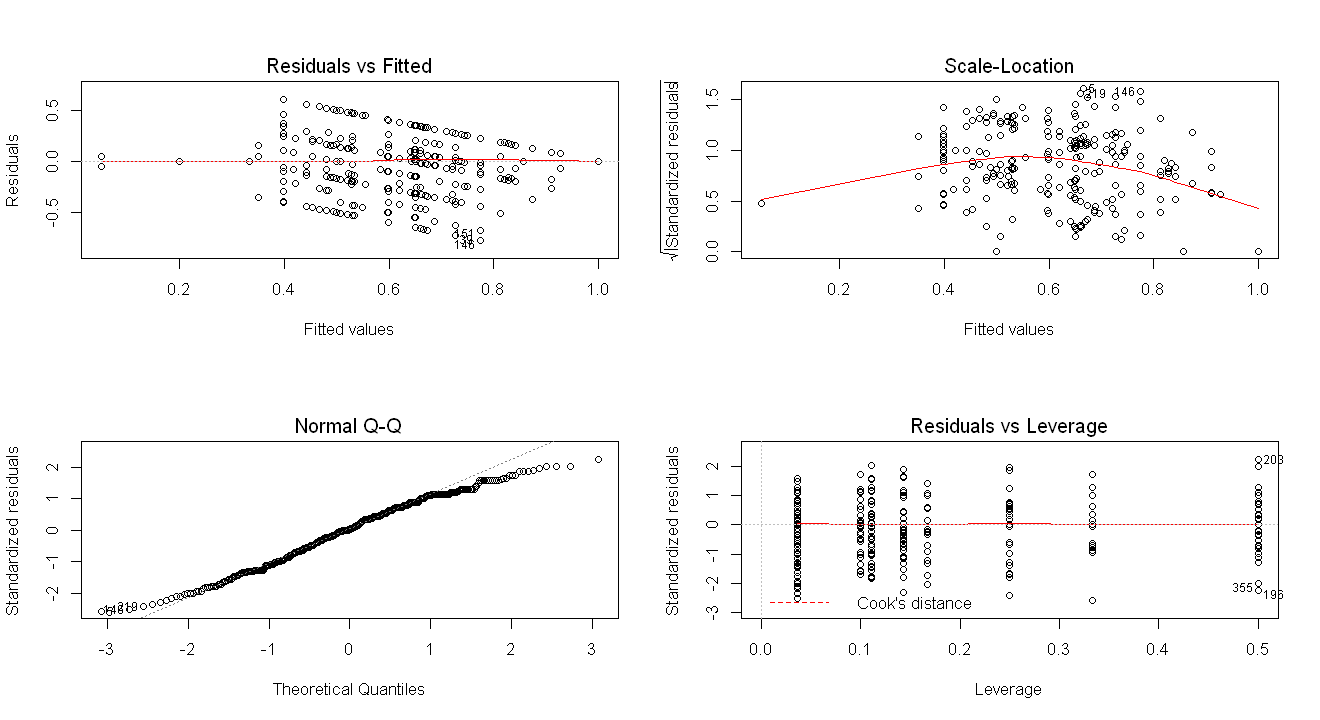

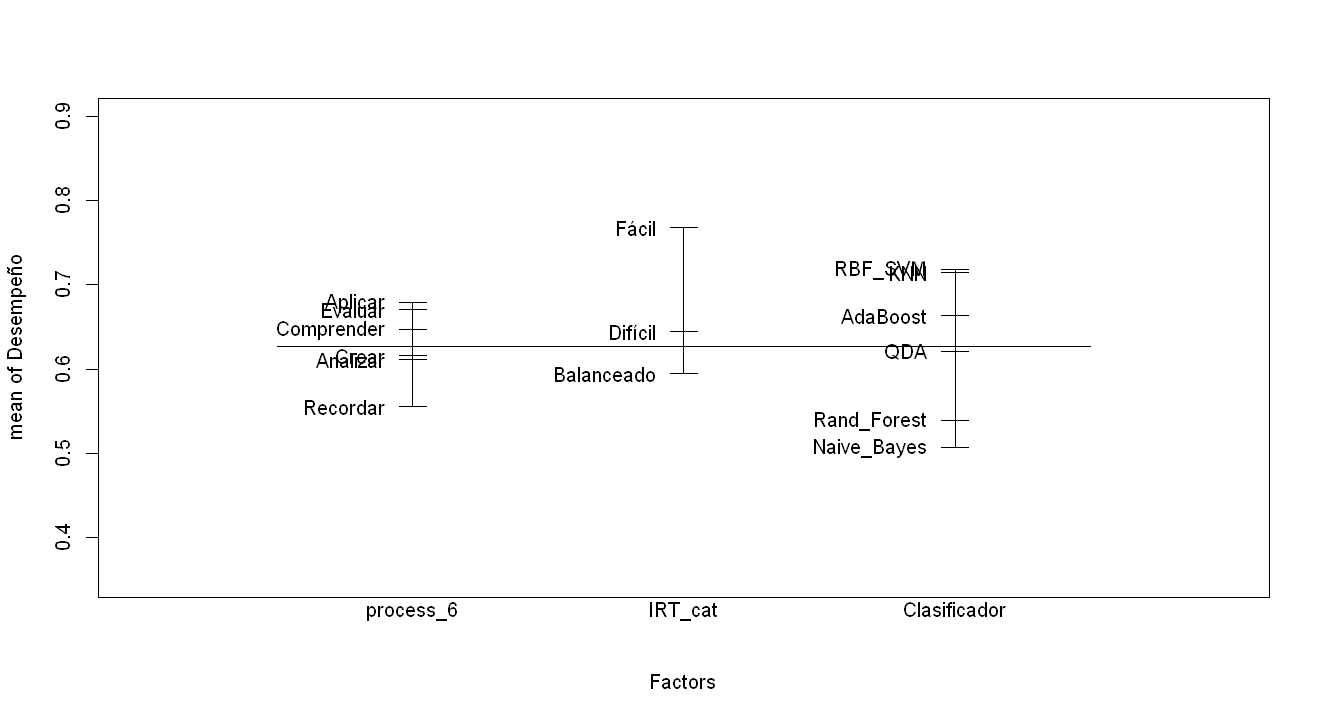

In [30]:
layout(matrix(c(1,2,3,4),2,2)) # optional layout
plot(process_6_aov_3f) # diagnostic plots
par(mfrow=c(1,1))
plot.design(Desempeño~ ., data = dat_AOV_6[c("process_6","IRT_cat","Clasificador","Desempeño")], ylim=plot_y_lims)


In [31]:
leveneTest(IRT_difficulty ~ process_6, data = data_6)
irt_dif_process_6_aov <- aov(IRT_difficulty ~ process_6, data = data_6)
summary(irt_dif_process_6_aov)
TukeyHSD(irt_dif_process_6_aov)# ,which =c("IRT_cat","process_6"))

,Df,F value,Pr(>F)
group,5,1.172514,0.3306849
,75,NA,NA


            Df Sum Sq Mean Sq F value Pr(>F)  
process_6    5  12.99  2.5977   3.033 0.0151 *
Residuals   75  64.24  0.8565                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = IRT_difficulty ~ process_6, data = data_6)

$process_6
                           diff        lwr       upr     p adj
Comprender-Recordar -0.40245238 -1.2884507 0.4835460 0.7683506
Aplicar-Recordar    -0.50800000 -2.2552123 1.2392123 0.9568064
Analizar-Recordar   -0.07184314 -1.0923953 0.9487090 0.9999469
Evaluar-Recordar    -1.11091667 -2.6736709 0.4518375 0.3093445
Crear-Recordar       1.33733333 -0.4098790 3.0845456 0.2328288
Aplicar-Comprender  -0.10554762 -1.7231519 1.5120567 0.9999636
Analizar-Comprender  0.33060924 -0.4474778 1.1086963 0.8143681
Evaluar-Comprender  -0.70846429 -2.1248306 0.7079020 0.6885465
Crear-Comprender     1.73978571  0.1221814 3.3573900 0.0276754
Analizar-Aplicar     0.43615686 -1.2588881 2.1312018 0.9744036
Evaluar-Aplicar     -0.60291667 -2.6702461 1.4644128 0.9562481
Crear-Aplicar        1.84533333 -0.3647348 4.0554015 0.1553241
Evaluar-Analizar    -1.03907353

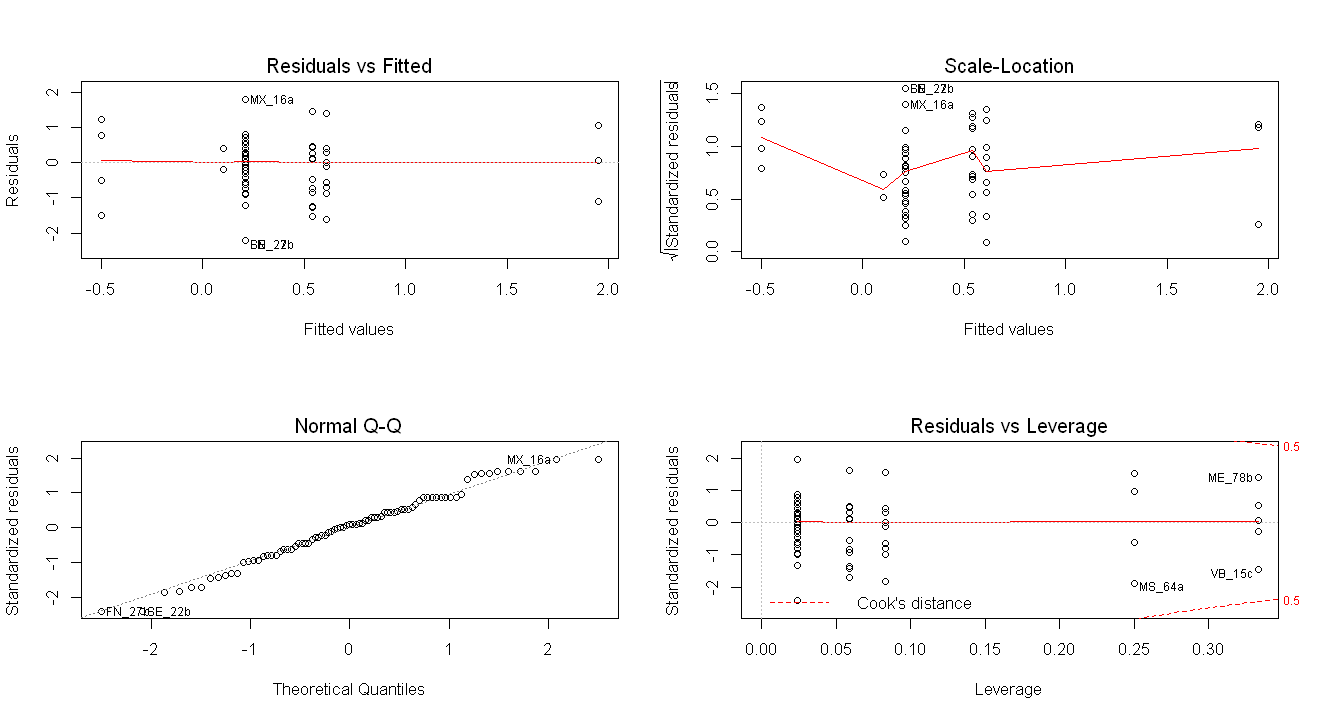

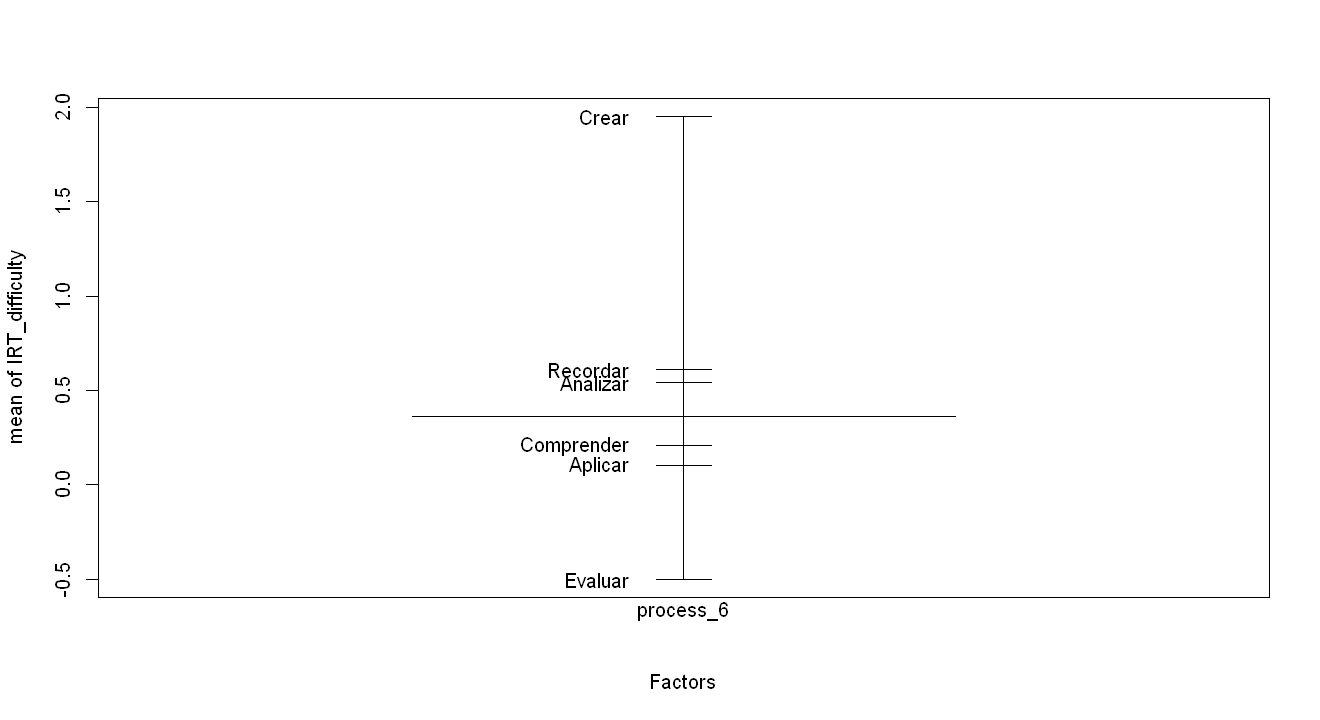

In [32]:
layout(matrix(c(1,2,3,4),2,2)) # optional layout
plot(irt_dif_process_6_aov) # diagnostic plots
par(mfrow=c(1,1))
plot.design(IRT_difficulty ~ process_6, data = data_6)#, ylim=plot_y_lims)


# t-test

In [33]:
t.test(IRT_difficulty ~ process_2, data=data_2 ,var.equal = TRUE)
t.test(KNN ~ process_2, data=data_2,var.equal = TRUE)
t.test(RBF_SVM ~ process_2, data=data_2,var.equal = TRUE)
t.test(Rand_Forest ~ process_2, data=data_2,var.equal = TRUE)
t.test(AdaBoost ~ process_2, data=data_2,var.equal = TRUE)
t.test(Naive_Bayes ~ process_2, data=data_2,var.equal = TRUE)
t.test(QDA ~ process_2, data=data_2,var.equal = TRUE)


	Two Sample t-test

data:  IRT_difficulty by process_2
t = 0.85981, df = 125, p-value = 0.3915
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3317452  0.8414089
sample estimates:
   mean in group Retener mean in group Transferir 
               0.6116667                0.3568348 



	Two Sample t-test

data:  KNN by process_2
t = -1.2154, df = 125, p-value = 0.2265
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.28352333  0.06778275
sample estimates:
   mean in group Retener mean in group Transferir 
               0.6294167                0.7372870 



	Two Sample t-test

data:  RBF_SVM by process_2
t = -1.0635, df = 125, p-value = 0.2896
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.28871315  0.08688127
sample estimates:
   mean in group Retener mean in group Transferir 
               0.6106667                0.7115826 



	Two Sample t-test

data:  Rand_Forest by process_2
t = 0.20646, df = 125, p-value = 0.8368
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1845196  0.2275022
sample estimates:
   mean in group Retener mean in group Transferir 
               0.5515000                0.5300087 



	Two Sample t-test

data:  AdaBoost by process_2
t = -0.51775, df = 125, p-value = 0.6055
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2303562  0.1348229
sample estimates:
   mean in group Retener mean in group Transferir 
               0.5988333                0.6466000 



	Two Sample t-test

data:  Naive_Bayes by process_2
t = -0.72423, df = 125, p-value = 0.4703
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2565368  0.1190846
sample estimates:
   mean in group Retener mean in group Transferir 
               0.4285000                0.4972261 



	Two Sample t-test

data:  QDA by process_2
t = -1.0605, df = 125, p-value = 0.291
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.27318262  0.08256088
sample estimates:
   mean in group Retener mean in group Transferir 
               0.5127500                0.6080609 


# Corr Test

In [34]:
cor.test(data$IRT_difficulty, data$KNN)
cor.test(data$IRT_difficulty, data$RBF_SVM)
cor.test(data$IRT_difficulty, data$Rand_Forest)
cor.test(data$IRT_difficulty, data$AdaBoost)
cor.test(data$IRT_difficulty, data$Naive_Bayes)
cor.test(data$IRT_difficulty, data$QDA)


	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$KNN
t = -0.21171, df = 129, p-value = 0.8327
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1895566  0.1533788
sample estimates:
        cor 
-0.01863703 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$RBF_SVM
t = -2.2204, df = 129, p-value = 0.02814
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.35180869 -0.02102738
sample estimates:
       cor 
-0.1918609 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$Rand_Forest
t = 1.5888, df = 129, p-value = 0.1146
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03379468  0.30286269
sample estimates:
      cor 
0.1385338 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$AdaBoost
t = -0.22314, df = 129, p-value = 0.8238
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1905262  0.1523963
sample estimates:
        cor 
-0.01964261 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$Naive_Bayes
t = -0.43806, df = 129, p-value = 0.6621
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2086866  0.1338698
sample estimates:
        cor 
-0.03854066 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$QDA
t = -0.28262, df = 129, p-value = 0.7779
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1955663  0.1472787
sample estimates:
        cor 
-0.02487522 
